In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.backends.backend_pdf
pd.options.mode.chained_assignment = None  # default='warn'

import glob
import os

In [22]:
df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p
0,vz_Brainmap_slice1,vz_Brainmap_slice1,puncta,Abcc9,1,30,3.5,903.0,-0.266,-0.954686,0.339736,0.959802
1,vz_Brainmap_slice1,vz_Brainmap_slice1,puncta,Abcc9,13,28,4.0,905.5,0.131,0.436218,0.662679,0.998526
2,vz_Brainmap_slice1,vz_Brainmap_slice1,puncta,Abcc9,14,118,6.0,891.5,0.051,1.023272,0.306179,0.959802
3,vz_Brainmap_slice1,vz_Brainmap_slice1,puncta,Ackr1,0,1645,10.0,953.0,-0.026,-0.096929,0.922783,0.998526
4,vz_Brainmap_slice1,vz_Brainmap_slice1,puncta,Ackr1,1,1434,11.0,905.0,0.046,1.961886,0.049776,0.955971
...,...,...,...,...,...,...,...,...,...,...,...,...
6915,vz_Brainmap_slice3,vz_Brainmap_slice3,puncta,Vmn1r43,18,22,2.0,1174.5,-0.270,-1.036625,0.299911,0.952431
6916,vz_Brainmap_slice3,vz_Brainmap_slice3,puncta,Vmn1r43,21,21,2.0,1362.0,-0.016,-0.669084,0.503442,0.991021
6917,vz_Brainmap_slice3,vz_Brainmap_slice3,puncta,Vmn2r1,4,20,2.0,1300.5,0.138,0.261552,0.793667,0.998996
6918,vz_Brainmap_slice3,vz_Brainmap_slice3,puncta,Vmn2r1,6,32,2.0,1294.0,0.033,-0.784889,0.432518,0.978636


sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.842497
BICCN_mouse2,0.842497,1.000000


sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.948424
BICCN_mouse2,0.948424,1.000000


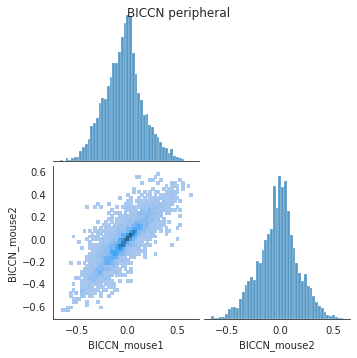

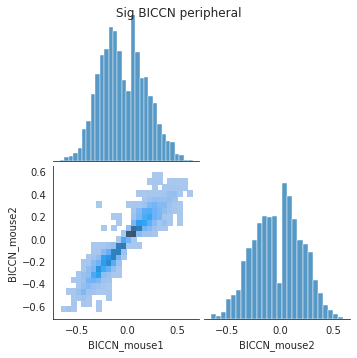

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.804207
BICCN_mouse2,0.804207,1.000000


sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.949436
BICCN_mouse2,0.949436,1.000000


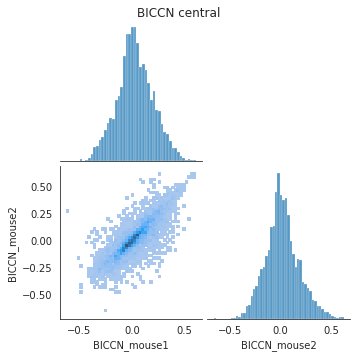

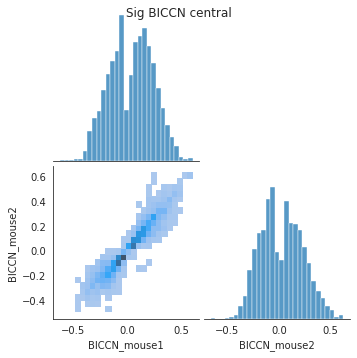

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.818002
BICCN_mouse2,0.818002,1.000000


sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.882966
BICCN_mouse2,0.882966,1.000000


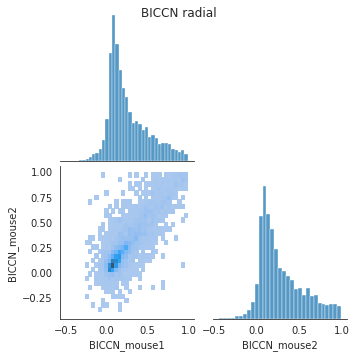

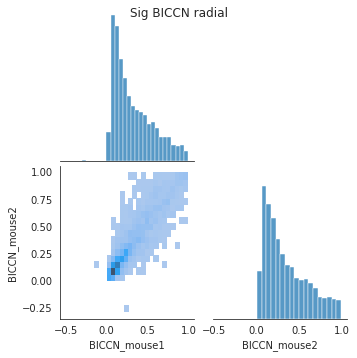

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.810962
BICCN_mouse2,0.810962,1.000000


sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.858779
BICCN_mouse2,0.858779,1.000000


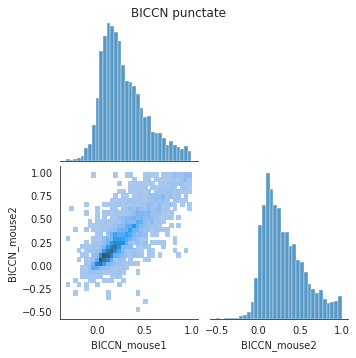

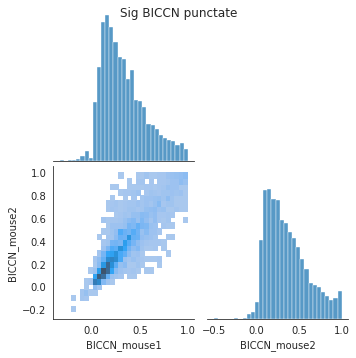

In [24]:
#Pairplots for experiments with replicate samples
#uses the gene/ont datasets for plotting

sns.set_style("white")

metrics = ['peripheral','central','radial','punctate']
experiment_samples = {
    'BICCN':['BICCN_mouse1','BICCN_mouse2'],
    'vz_Brainmap':['vz_Brainmap_slice1','vz_Brainmap_slice2','vz_Brainmap_slice3'],
    'vz_Liver':['vz_Liver_mouse1','vz_Liver_mouse2'],
}

stem = '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont'

for experiment,samples in experiment_samples.items():
    for metric in metrics:
        df = pd.DataFrame()
        for sample in samples:
            f_path = glob.glob(os.path.join(stem,sample)+'*'+metric+'*')
            if not f_path:
                continue
                
            sample_df = pd.read_csv(f_path[0])
            sample_df['sample'] = sample
            df = pd.concat((df,sample_df))
            
        if df.empty:
            continue
            
        #Pairplot
        sample_pair_df = df.pivot_table(
            index = ['gene','annotation'],
            columns = 'sample',
            values = 'med_score',
            aggfunc = 'median',
        )
        display(sample_pair_df.corr())
        
        sig_sample_pair_df = df[df['bh_p'].le(0.05)].pivot_table(
            index = ['gene','annotation'],
            columns = 'sample',
            values = 'med_score',
            aggfunc = 'median',
        )
        display(sig_sample_pair_df.corr())

        fig = sns.pairplot(
            sample_pair_df,
            kind = 'hist',
            corner = True,
        )
        plt.suptitle('{} {}'.format(experiment,metric))
        plt.show()
        plt.close()
        
        fig = sns.pairplot(
            sig_sample_pair_df,
            kind = 'hist',
            corner = True,
        )
        plt.suptitle('Sig {} {}'.format(experiment,metric))
        plt.show()
        plt.close()
        

                    


# Pairplots for permuted datasets

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.003201
BICCN_mouse2,0.003201,1.000000


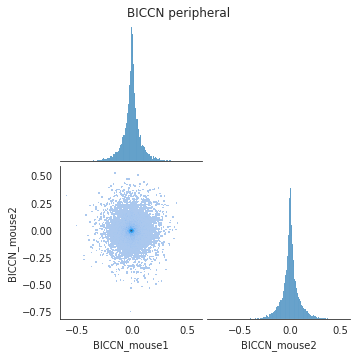

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.005309
BICCN_mouse2,0.005309,1.000000


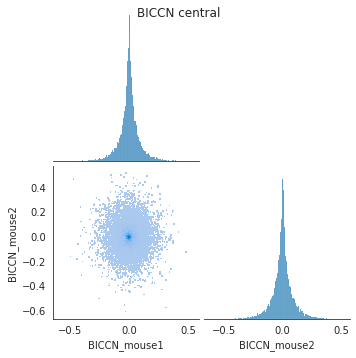

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.038045
BICCN_mouse2,0.038045,1.000000


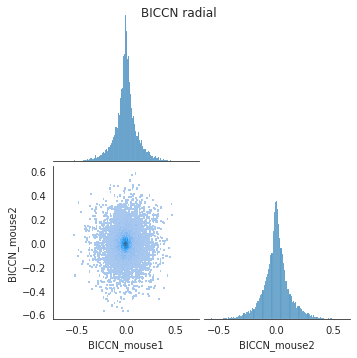

sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.014273
BICCN_mouse2,0.014273,1.000000


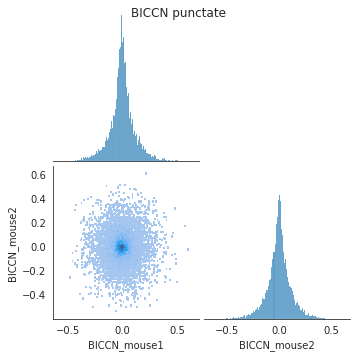

sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,-0.015587,-0.013980
vz_Brainmap_slice2,-0.015587,1.000000,-0.008479
vz_Brainmap_slice3,-0.013980,-0.008479,1.000000


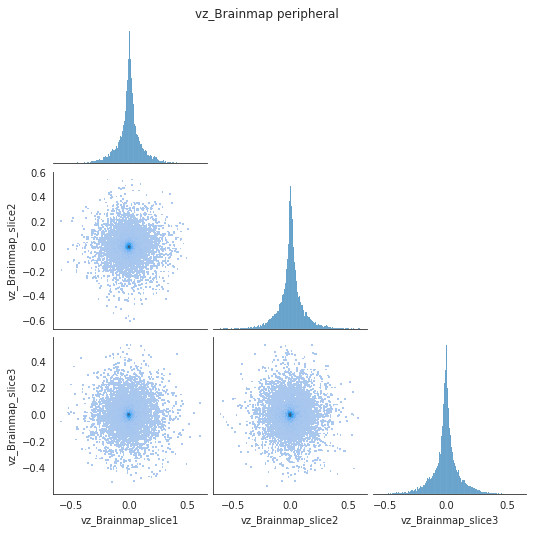

sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,-0.018676,0.001826
vz_Brainmap_slice2,-0.018676,1.000000,-0.014651
vz_Brainmap_slice3,0.001826,-0.014651,1.000000


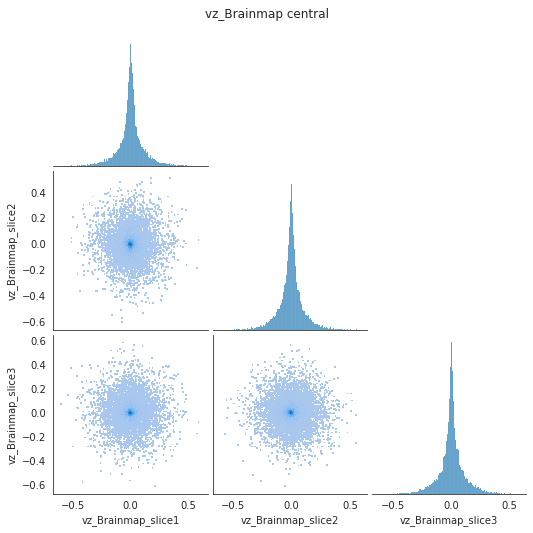

sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,0.007984,-0.016677
vz_Brainmap_slice2,0.007984,1.000000,0.012579
vz_Brainmap_slice3,-0.016677,0.012579,1.000000


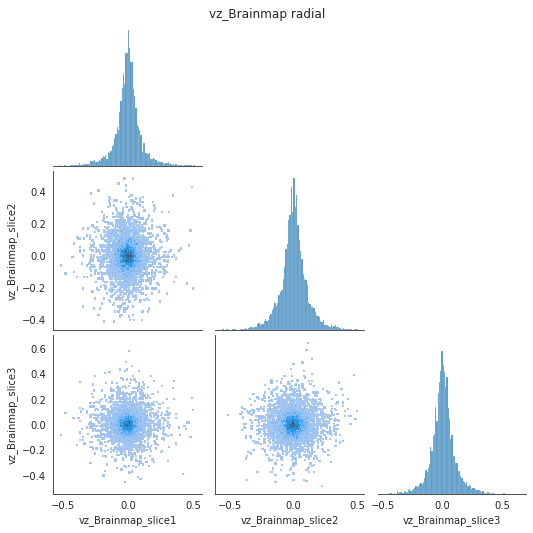

sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,-0.017512,0.008036
vz_Brainmap_slice2,-0.017512,1.000000,-0.055502
vz_Brainmap_slice3,0.008036,-0.055502,1.000000


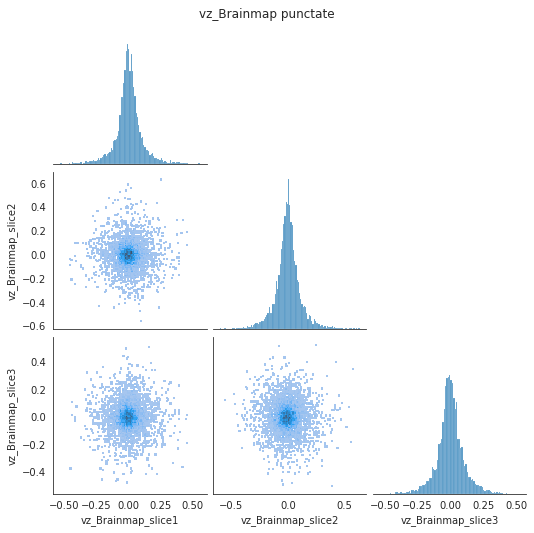

In [18]:
#Pairplots for experiments with replicate samples
#uses the gene/ont datasets for plotting

sns.set_style("white")

metrics = ['peripheral','central','radial','punctate']
experiment_samples = {
    'BICCN':['BICCN_mouse1','BICCN_mouse2'],
    'vz_Brainmap':['vz_Brainmap_slice1','vz_Brainmap_slice2','vz_Brainmap_slice3'],
}

stem = '../../nf_pipeline/outputs/SRRS_20220531_permuted/gene_ont'

for experiment,samples in experiment_samples.items():
    for metric in metrics:
        df = pd.DataFrame()
        for sample in samples:
            f_path = glob.glob(os.path.join(stem,sample)+'*'+metric+'*')
            if not f_path:
                continue
                
            sample_df = pd.read_csv(f_path[0])
            sample_df['sample'] = sample
            df = pd.concat((df,sample_df))
            
        if df.empty:
            continue 
            
        #Pairplot
        sample_pair_df = df.pivot_table(
            index = ['gene','annotation'],
            columns = 'sample',
            values = 'med_score',
            aggfunc = 'median',
        )
        display(sample_pair_df.corr())

        fig = sns.pairplot(
            sample_pair_df,
            kind = 'hist',
            corner = True,
        )
        plt.suptitle('{} {}'.format(experiment,metric))
        plt.show()
        plt.close()
        

                    
